In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
import joblib

def kor_senti(pipe, cvect, nb, series):
    '''
    모델은 joblib으로 불러온 파이프라인 입력
    시리즈는 분석하고자 하는 데이터프레임의 시리즈 입력
    긍정, 부정 튜플 리턴
    '''
    series = series
    series = series.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ').str.strip()
    series = series.dropna()

    positive = 0
    negative = 0
    
    if pipe != "":
        model = pipe
        

        for i in series:
            score = model.predict([i])
            score = score.astype(int)

            if score == 1:
                positive += 1
            else:
                negative += 1
        # 그래프 그리기
        plt.figure(linewidth=2)    
        plt.bar(np.arange(2), [positive, negative])
        plt.xticks(np.arange(2), ['positive', 'negative'])
        plt.savefig("kor_sent.png",edgecolor='blue')
        
        return (positive, negative)

    else:

        for i in series:
            review_cv = cvect.transform([i])
            score = nb.predict(review_cv)
            if score == 1:
                positive += 1
            else:
                negative += 1

        # 그래프 그리기
        plt.figure(linewidth=2)    
        plt.bar(np.arange(2), [positive, negative])
        plt.xticks(np.arange(2), ['positive', 'negative'])
        plt.savefig("kor_sent.png",edgecolor='blue')
        
        return (positive, negative)


def eng_senti(pipe, cvect, nb, series):
    series = series
    series = series.str.replace('[^A-Za-z]',' ').str.strip()
    series = series.dropna()

    positive = 0
    negative = 0

    if pipe != "":
        model = pipe

        for i in series:
            score = model.predict([i])
            score = score.astype(int)

            if score == 1:
                positive += 1
            else:
                negative += 1
        # 그래프 그리기
        plt.figure(linewidth=2)    
        plt.bar(np.arange(2), [positive, negative])
        plt.xticks(np.arange(2), ['positive', 'negative'])
        plt.savefig("eng_sent.png",edgecolor='blue')

        return (positive, negative)
    
    else:

        for i in series:
            review_cv = cvect.transform([i])
            score = nb.predict(review_cv)
            if score == 1:
                positive += 1
            else:
                negative += 1
        # 그래프 그리기
        plt.figure(linewidth=2)    
        plt.bar(np.arange(2), [positive, negative])
        plt.xticks(np.arange(2), ['positive', 'negative'])
        plt.savefig("eng_sent.png",edgecolor='blue')

        return (positive, negative)

    
    

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4592\3876707171.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ').str.strip()


(155, 44)

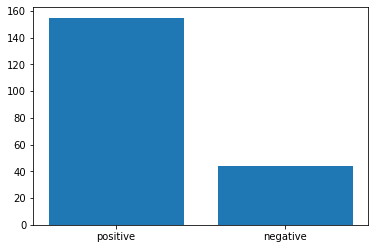

In [4]:
pipe = joblib.load('../data/감성분석/model/한글(ai)_pipe.pkl')
cvect = joblib.load("../data/감성분석/model/한글_cvect.pkl")
nb = joblib.load("../data/감성분석/model/한글_nb.pkl")
df = pd.read_csv("../data/감성분석/crawling/instagram_옥수수.csv", sep=",")
series = df.main_text

kor_senti(pipe, cvect, nb,series)

In [19]:
pipe = joblib.load('../data/감성분석/model/영어_pipe.pkl')
cvect = joblib.load("../data/감성분석/model/영어_cvect.pkl")
nb = joblib.load("../data/감성분석/model/영어_nb.pkl")
df = pd.read_csv("../data/감성분석/crawling/instagram_밀.csv", sep=",")
series = df.main_text

eng_senti("", cvect, nb, series)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17624\1249588248.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace('[^A-Za-z]',' ').str.strip()


(253, 247)